In [8]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

In [9]:
DOMS = ["T1070-D1","T1039-D1","T1043-D1","T1064-D1"]

VALS = [[0.6359188556671143, 9.905558586120605], [0.46800848841667175, 7.6171393394470215], [0.3468859791755676, 19.818099975585938], [0.5202039480209351, 3.4558987617492676]]

vals = {d:v for d,v in zip(DOMS,VALS)}


## Plot most confident point on each trajectory


In [10]:
# colors correspond to learning rates
colors = ['paleturquoise', 'mediumturquoise', 'lightseagreen']*30

In [11]:
# markers correspond to cooling schemes
marker = {}
marker['None'] = 'o'
marker['Gentle_Cool'] = 'D'

highest confidence prediction pLDDT, RMSD  (0.87166613, 1.4783279)
highest confidence prediction pLDDT, RMSD  (0.9096656, 2.7457058)
highest confidence prediction pLDDT, RMSD  (0.92229015, 2.6592667)
highest confidence prediction pLDDT, RMSD  (0.8392159, 23.950672)


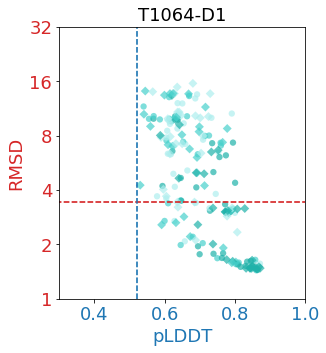

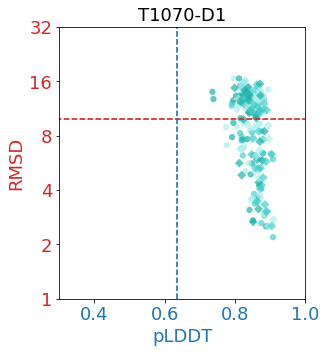

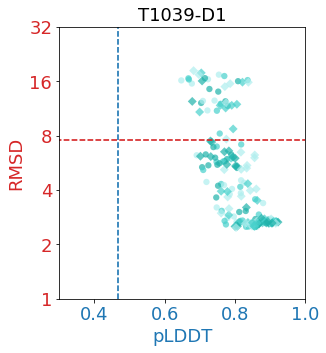

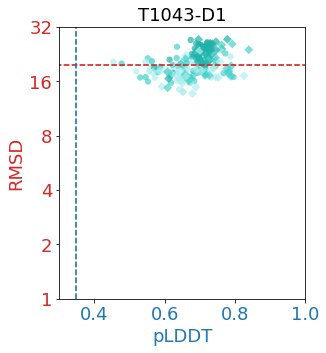

In [18]:
adv_loss = "None"
mode = "random"
out_path_base = "../data_for_AF_figures/"
n =1
lw = .5
alpha = .5

for_df = []
plt.rcParams.update({'font.size': 18})
for DOM in ["T1064-D1","T1070-D1", "T1039-D1","T1043-D1"]:
    k = 0
    all_rs = []

    for e_val in ['None']:
    #for e_val in ['None', '1e-3', '1e-15']:
        plt.figure(figsize=(15,5*n))
        k +=1
        bests = []
        for temp in ["None", "Gentle_Cool"]:
        #for temp in ["None", "Short_Cool", "Smooth_Cool"]:
            
            #nothing to filter out here, so don't bother running
            if DOM == "T1043-D1" and e_val == '1e-3':
                continue

            label = ""

            out_path = f"{out_path_base}/{DOM}_e_{e_val}_t_{temp}"
            npy_file = f"{out_path}/{DOM}.traj.{adv_loss}.{mode}.npy"
            #print(npy_file)

            if os.path.isfile(npy_file):
                #print("found it")
                #print(k)
                losses = np.load(npy_file)
                ps = np.max(losses[:,:,1], axis = -1)
                ps_am = np.argmax(losses[:,:,1], axis = -1)
                rs = []
                for _ in range(len(ps_am)):
                    rs.append(losses[:,:,2].T[ps_am[_],_])
                plt.subplot(n,3,k)
                plt.scatter(ps, # plddt
                            rs, # rmsd
                            vmin=10, vmax=80,s=40, label=temp, alpha = .7, color = colors, marker= marker[temp], linewidth = 0)
                
                plt.yscale("log",base=2,)
                plt.yticks([1,2,4,8,16,32],[1,2,4,8,16,32],color="tab:red")
                plt.ylim(1,32)
                plt.ylabel("RMSD",color="tab:red")
                bests.append((np.max(ps), rs[np.argmax(ps)]))
                #if k in [n*3]: 
                plt.xlabel("pLDDT",color="tab:blue")
                plt.xlim(0.3,1.0)
                plt.xticks([0.4,0.6,0.8,1.0],[0.4,0.6,0.8,1.0],color="tab:blue")

                #plt.plot([0.2,1],[vals[DOM][1],vals[DOM][1]],"--",color="tab:red")
                #plt.plot([vals[DOM][0],vals[DOM][0]],[1,32],"--",color="tab:blue")
                plt.plot([0.2,1],[vals[DOM][1],vals[DOM][1]],"--",color="tab:red", alpha = 0.8)
                plt.plot([vals[DOM][0],vals[DOM][0]],[1,32],"--",color="tab:blue", alpha = 0.8)

               # plt.legend()
                plt.title(f"{DOM}",fontsize = 18)
                all_rs += rs
        print("highest confidence prediction pLDDT, RMSD ",max(bests))
        thresh = 1.25* max(bests)[1]
        for_df.append([DOM, max(bests)[1], thresh, sum([1.0 for r in all_rs if r<thresh])/len(all_rs)])
        plt.savefig(f"../figures/{DOM}_best_per_traj.svg", bbox_inches='tight')
        #plt.show()

df = pd.DataFrame(for_df, columns = ['Domain', 'Best', 'Thresh','Fraction below thresh'])


In [19]:
df = df.set_index("Domain")

In [20]:
df

,Best,Thresh,Fraction below thresh
Domain,,,
T1064-D1,1.478328,1.847910,0.177778
T1070-D1,2.745706,3.432132,0.094444
T1039-D1,2.659267,3.324083,0.472222
T1043-D1,23.950672,29.938340,1.000000


In [21]:
DOMS = ["T1039-D1","T1064-D1","T1070-D1"]

VALS_R = [[0.74, 2.79],[.40,12.15],[.67, 4.48]]

vals_r = {d:v for d,v in zip(DOMS,VALS_R)}

T1064-D1 highest confidence prediction pLDDT, RMSD  (0.8761522, 1.5524526)
180
T1039-D1 highest confidence prediction pLDDT, RMSD  (0.8998832, 3.2341647)
180
T1070-D1 highest confidence prediction pLDDT, RMSD  (0.9123933, 1.9636279)
180


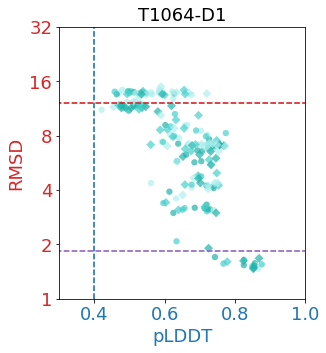

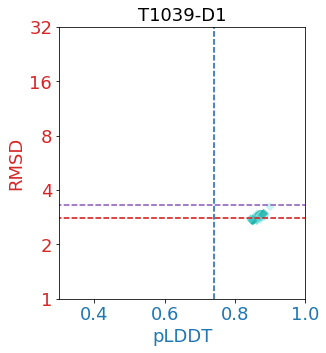

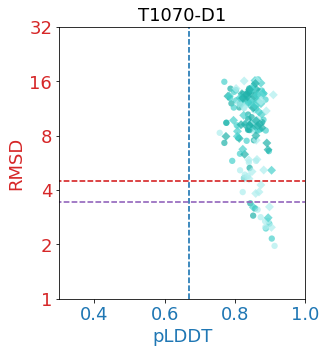

In [22]:
adv_loss = "None"
mode = "random"
out_path_base = "../data_for_AF_figures/"
n =1
lw = .5
alpha = .5
e_val_d ={}
e_val_d["T1064-D1"] = '1e-3'
e_val_d["T1070-D1"] = '1e-3'
e_val_d["T1039-D1"] = '1e-15'
frac_good = {}
plt.rcParams.update({'font.size': 18})
for DOM in ["T1064-D1", "T1039-D1", "T1070-D1"]:
    k = 0
    e_val = e_val_d[DOM]
    plt.figure(figsize=(15,5*n))
    k +=1
    bests = []
    thresh = df["Thresh"][DOM]
    all_rs = []
    for temp in ["None", "Gentle_Cool"]:
    #for temp in ["None", "Short_Cool", "Smooth_Cool"]:
        
        label = ""

        out_path = f"{out_path_base}/{DOM}_e_{e_val}_t_{temp}"
        npy_file = f"{out_path}/{DOM}.traj.{adv_loss}.{mode}.npy"
        #print(npy_file)

        if os.path.isfile(npy_file):
            #print("found it")
            #print(k)
            losses = np.load(npy_file)
            ps = np.max(losses[:,:,1], axis = -1)
            ps_am = np.argmax(losses[:,:,1], axis = -1)
            rs = []
            for _ in range(len(ps_am)):
                rs.append(losses[:,:,2].T[ps_am[_],_])
            plt.subplot(n,3,k)
            plt.scatter(ps, # plddt
                        rs, # rmsd
                        vmin=10, vmax=80,s=40, label=temp, alpha = .7, color = colors, marker= marker[temp], linewidth = 0)

            plt.yscale("log",base=2,)
            plt.yticks([1,2,4,8,16,32],[1,2,4,8,16,32],color="tab:red")
            plt.ylim(1,32)
            plt.ylabel("RMSD",color="tab:red")
            bests.append((np.max(ps), rs[np.argmax(ps)]))
            #if k in [n*3]: 
            plt.xlabel("pLDDT",color="tab:blue")
            plt.xlim(0.3,1.0)
            plt.xticks([0.4,0.6,0.8,1.0],[0.4,0.6,0.8,1.0],color="tab:blue")

            #plt.plot([0.2,1],[vals[DOM][1],vals[DOM][1]],"--",color="tab:red")
            #plt.plot([vals[DOM][0],vals[DOM][0]],[1,32],"--",color="tab:blue")
            plt.plot([0.2,1],[vals_r[DOM][1],vals_r[DOM][1]],"--",color="tab:red", alpha = 0.8)
            plt.plot([vals_r[DOM][0],vals_r[DOM][0]],[1,32],"--",color="tab:blue", alpha = 0.8)
            plt.plot([0.2,1],[thresh,thresh],"--",color="tab:purple", alpha = 0.8)

            all_rs += rs
           # plt.legend()
            plt.title(f"{DOM}",fontsize = 18)

    print(f"{DOM} highest confidence prediction pLDDT, RMSD ",max(bests))
    frac_good[DOM] = sum([1.0 for r in all_rs if r<thresh])/len(all_rs)
    print(len(all_rs))
    plt.savefig(f"../figures/{DOM}_best_per_traj_restricted.svg", bbox_inches='tight')
    #plt.show()



In [24]:
frac_good['T1043-D1'] = None

In [25]:
frac_good

{'T1064-D1': 0.08888888888888889,
 'T1039-D1': 1.0,
 'T1070-D1': 0.08888888888888889,
 'T1043-D1': None}

In [26]:
df["Fraction below thresh restricted"] = [frac_good[d] for d in df.index]

In [27]:
df = df.reindex(["T1064-D1","T1039-D1","T1070-D1"])
df

,Best,Thresh,Fraction below thresh,Fraction below thresh restricted
Domain,,,,
T1064-D1,1.478328,1.847910,0.177778,0.088889
T1039-D1,2.659267,3.324083,0.472222,1.000000
T1070-D1,2.745706,3.432132,0.094444,0.088889


In [28]:
with pd.option_context('precision', 2):
    display(df)

,Best,Thresh,Fraction below thresh,Fraction below thresh restricted
Domain,,,,
T1064-D1,1.48,1.85,0.18,0.09
T1039-D1,2.66,3.32,0.47,1.00
T1070-D1,2.75,3.43,0.09,0.09


In [29]:
df_new = pd.DataFrame()
df_new["Learned MSAs \n on all seqs"]= df["Fraction below thresh"]
df_new["Learned MSAs \n on restricted seqs"]= df["Fraction below thresh restricted"]
rd = {}
for DOM in ["T1064-D1", "T1039-D1", "T1070-D1"]:
     rd[DOM] = f'{DOM} \n (< {df["Thresh"][DOM]:.2f})'
df_new = df_new.rename(index=rd)

In [30]:
df_new

,Learned MSAs \n on all seqs,Learned MSAs \n on restricted seqs
Domain,,
T1064-D1 \n (< 1.85),0.177778,0.088889
T1039-D1 \n (< 3.32),0.472222,1.000000
T1070-D1 \n (< 3.43),0.094444,0.088889


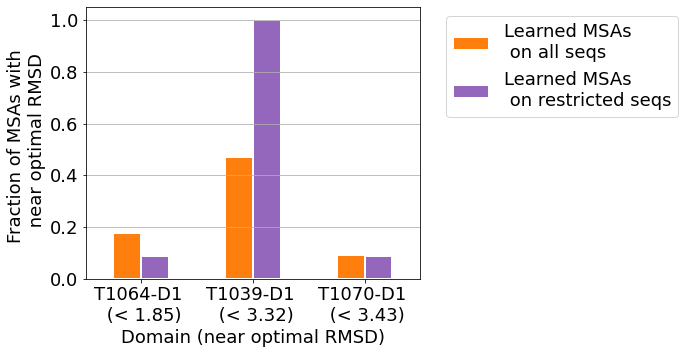

In [31]:
plt.rcParams.update({'font.size': 18})
ax = df_new.plot.bar(rot=0,figsize = (6,5), edgecolor='white', linewidth=2, color = [ 'tab:orange', 'tab:purple'])
ax.set_ylabel("Fraction of MSAs with \n near optimal RMSD")
ax.set_xlabel("Domain (near optimal RMSD)")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.grid(axis = 'y')
plt.savefig(f"../figures/below_thresh_compare.svg", bbox_inches='tight')
